In [12]:
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
import random
import os
from sklearn import svm
from sklearn import grid_search
from sklearn.preprocessing import normalize
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.cross_validation import KFold

# Spam dataset

Get data

In [9]:
cwd = "/Users/Yolica/Google Drive/CS289A/hw2017/HW1"
spam = sio.loadmat(cwd+"/hw01_data/spam/spam_data.mat")

spam_train = spam['training_data']
#spam_train = normalize(spam_train)
spam_train_labels = spam['training_labels']
spam_test = spam['test_data']  # spam test set
#spam_test = normalize(spam_test)

samplerowT = random.sample(range(0,len(spam_train)),round(0.8*len(spam_train)))
samplerowF = [i for i in range(len(spam_train)) if i not in samplerowT]           
train_spam = spam_train[samplerowT]

val_spam = spam_train[samplerowF]

label_spam = spam_train_labels[0][samplerowT]
label_val_spam = spam_train_labels[0][samplerowF]

trainSpam = {"train" : train_spam,
             "label" : label_spam}


def random_split_spam(dataset, k):
    samplerowT = random.sample(range(0,len(dataset["train"])),k)
    train_spam = dataset["train"][samplerowT]
    label_spam = dataset["label"][samplerowT]
    return({'trainset':train_spam,
            'label':label_spam})
  

In [19]:
model = RandomForestClassifier(n_estimators= 100)
model.fit(train_spam,label_spam)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [18]:
model = GradientBoostingClassifier(n_estimators= 100)
model.fit(train_spam,label_spam)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

In [20]:
model.score(val_spam,label_val_spam)

0.9198355601233299

Problem2(a) error rate

In [5]:
example = [100, 200, 500, 1000, 2000, 3893]
train_err = []
for i in example:
    train = random_split_spam(trainSpam,i)
    model = svm.SVC(kernel="linear").fit(train['trainset'],train['label'])
    acc = model.score(train['trainset'],train['label'])
    print('Sample size is', i, ';', 'Training Accuracy is', acc)
    train_err.append(acc)
print(train_err)

example = [100, 200, 500, 1000, 2000, 3893]
val_err = []
for i in example:
    train = random_split_spam(trainSpam,i)
    model = svm.SVC(kernel="linear").fit(train['trainset'],train['label'])
    acc = model.score(val_spam,label_val_spam)
    print('Sample size is', i, ';', 'Validation Accuracy is', acc)
    val_err.append(acc)
print(val_err)

Sample size is 100 ; Training Accuracy is 0.98
Sample size is 200 ; Training Accuracy is 0.945
Sample size is 500 ; Training Accuracy is 0.926
Sample size is 1000 ; Training Accuracy is 0.936
Sample size is 2000 ; Training Accuracy is 0.9315
Sample size is 3893 ; Training Accuracy is 0.939121500128
[0.97999999999999998, 0.94499999999999995, 0.92600000000000005, 0.93600000000000005, 0.93149999999999999, 0.93912150012843565]
Sample size is 100 ; Validation Accuracy is 0.866392600206
Sample size is 200 ; Validation Accuracy is 0.86022610483
Sample size is 500 ; Validation Accuracy is 0.890030832477
Sample size is 1000 ; Validation Accuracy is 0.890030832477
Sample size is 2000 ; Validation Accuracy is 0.91161356629
Sample size is 3893 ; Validation Accuracy is 0.922918807811
[0.86639260020554987, 0.86022610483042139, 0.89003083247687564, 0.89003083247687564, 0.91161356628982526, 0.92291880781089419]


Plot

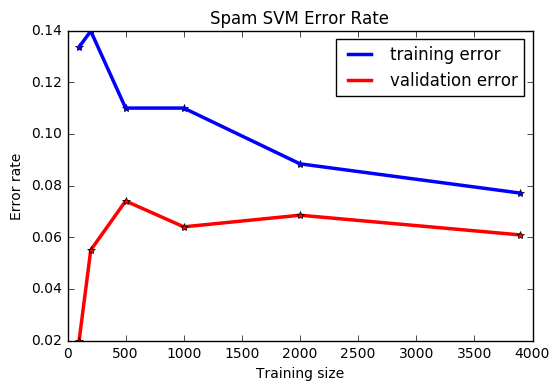

In [11]:
plt.plot(example,[1-a for a in val_err],'b*',color="blue")
plt.plot(example,[1-a for a in val_err],'r-',color="blue", linewidth=2.5, label = "training error")
plt.plot(example,[1-a for a in train_err],'r-', color="red",linewidth=2.5, label = "validation error")
plt.plot(example,[1-a for a in train_err],'b*', color="red")

plt.xlabel("Training size")
plt.ylabel("Error rate")
plt.title("Spam SVM Error Rate")
plt.legend(loc = "upper right")

plt.savefig("SpamLC.png",dpi=72)
plt.show()

Problem4 Cross Validation

In [7]:
C = [1,3,10,30,100,200,300,500]
kf = KFold(len(spam_train),n_folds = 5,shuffle=True)
C_acc_spam = []
for i in C:
    Acc_CV = []
    for train, val in kf:  
        X_train, X_val = spam_train[train],spam_train[val]
        y_train, y_val = spam_train_labels[0][train],spam_train_labels[0][val]
        model = svm.SVC(C = i, kernel="linear").fit(X_train,y_train)
        acc = model.score(X_val,y_val)
        Acc_CV.append(acc)
    acc_cv = np.mean(Acc_CV)
    C_acc_spam.append(acc_cv)
    print('C is', i,'The accuracy is ', acc_cv)
print(C_acc_spam)

C is 1 The accuracy is  0.926425395325
C is 3 The accuracy is  0.92745272248
C is 10 The accuracy is  0.926016194964
C is 30 The accuracy is  0.927866143577
C is 100 The accuracy is  0.931359646809
C is 200 The accuracy is  0.929920797888
C is 300 The accuracy is  0.929304359387
C is 500 The accuracy is  0.929714192858
[0.9264253953246907, 0.92745272248027333, 0.92601619496423981, 0.92786614357677843, 0.93135964680880701, 0.92992079788794368, 0.92930435938723366, 0.92971419285809254]


In [13]:
C_opt = C[C_acc_spam.index(max(C_acc_spam))]
print('The best C is',C_opt, ";", "the corresponding accuracy is", max(C_acc_spam))

The best C is 100 ; the corresponding accuracy is 0.931359646809


Prediction

In [14]:
model = svm.SVC(C = C_opt, kernel="linear").fit(spam_train,spam_train_labels[0])
result = model.predict(spam_test)

In [15]:
np.savetxt('prediction_spam.csv', result, delimiter = ',')